In [19]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
model = joblib.load("C:\\Users\\ravis\\Documents\\Python Programs\\Interview\\Machine Learning\\Advance Models\\Real-Time-Fraud-Detection-System\\fastapi_app\\models\\xgb_fraud_model.pkl")

fraud_df = pd.read_csv("creditcard_clean.csv")

In [15]:
df = fraud_df.drop(columns="hour of the day")

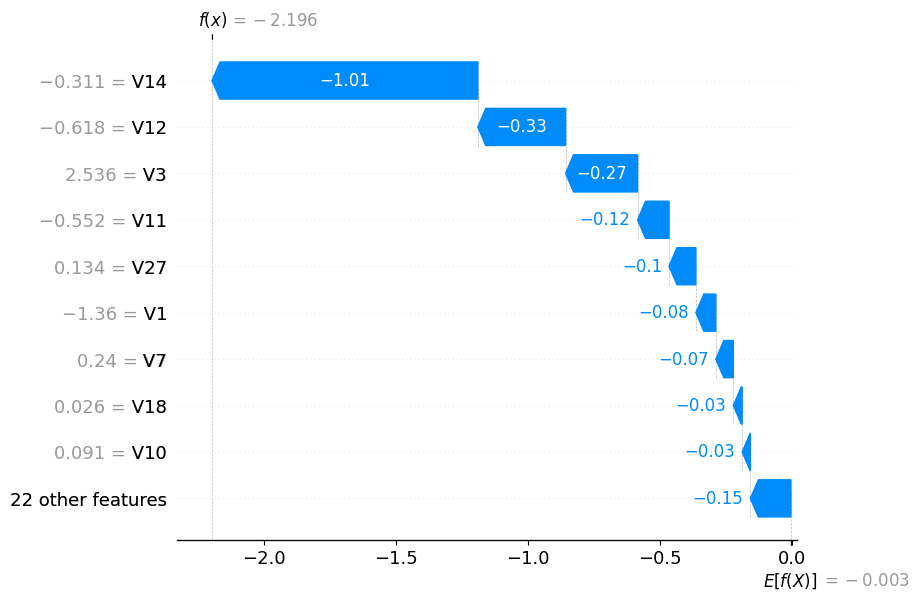

In [16]:

# Feature columns (same as training)
feature = [f"V{i}" for i in range(1,29)] + ["Amount", "hour_sin", "hour_cos"]


# Select sample transaction (row 0)
sample = df[feature].iloc[[0]]  # Keep double brackets to preserve DataFrame

# Create SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(sample)

# Plot waterfall — feature impact for prediction
shap.plots.waterfall(shap_values[0])


In [17]:
top_feats = sorted(
    zip(feature, shap_values[0].values),
    key=lambda x: abs(x[1]),
    reverse=True
)[:5]

print("Top SHAP features:")
for feat, val in top_feats:
    print(f" - {feat}: {round(val, 4)}")

Top SHAP features:
 - V14: -1.0068999528884888
 - V12: -0.33239999413490295
 - V3: -0.2727000117301941
 - V11: -0.11909999698400497
 - V27: -0.10180000215768814
